# Stock Market Example Project

In this example project we will be looking at data from the stock market, particularly some technology stocks.

We will use pandas to get stock information, visualise different aspects of it, and finally we will look at a few ways of analysing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

**Basic Analysis of Stock Information**

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader import data

In [5]:
import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.datetime(2021, 4, 14)

start = datetime.datetime(2020, 4, 14)

In [12]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [13]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-13,68.425003,66.457497,67.077499,68.312500,131022800.0,67.787041
2020-04-14,72.062500,69.512497,70.000000,71.762497,194994800.0,71.210495
2020-04-15,71.582497,70.157501,70.599998,71.107498,131154400.0,70.560539
2020-04-16,72.050003,70.587502,71.845001,71.672501,157125200.0,71.121201
2020-04-17,71.737503,69.214996,71.172501,70.699997,215250000.0,70.156174
...,...,...,...,...,...,...
2021-04-07,127.919998,125.139999,125.830002,127.900002,83466700.0,127.900002
2021-04-08,130.389999,128.520004,128.949997,130.360001,88844600.0,130.360001
2021-04-09,133.039993,129.470001,129.800003,133.000000,106513800.0,133.000000


In [14]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-13,1220.510010,1187.598022,1209.180054,1217.560059,1739800,1217.560059
2020-04-14,1282.069946,1236.930054,1245.089966,1269.229980,2470400,1269.229980
2020-04-15,1280.459961,1240.400024,1245.609985,1262.469971,1671700,1262.469971
2020-04-16,1279.000000,1242.619995,1274.099976,1263.469971,2518100,1263.469971
2020-04-17,1294.430054,1271.229980,1284.849976,1283.250000,1949000,1283.250000


In [15]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,112.024822,109.036047,110.602421,110.590316,1.337823e+08,110.297474
std,20.217972,19.592508,20.069845,19.886698,5.211024e+07,20.014725
min,68.425003,66.357498,67.077499,67.092499,4.669130e+07,66.576424
25%,95.230003,93.480003,94.180000,94.809998,9.682040e+07,94.335396
50%,118.392502,115.169998,116.669998,116.360001,1.206393e+08,116.146439
75%,126.459999,123.052498,124.809998,125.010002,1.576117e+08,124.760002
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-13 to 2021-04-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

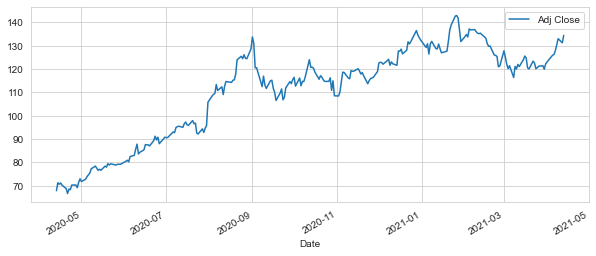

In [17]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

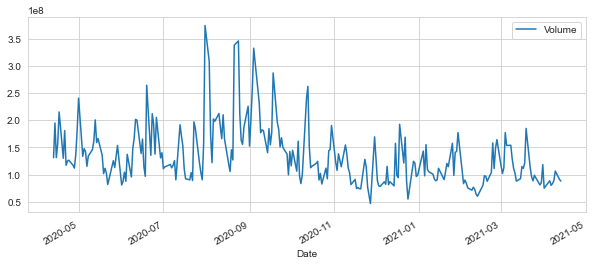

In [18]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

For more information on the moving average check out the following links:
1) https://www.investopedia.com/terms/m/movingaverage.asp

2) https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

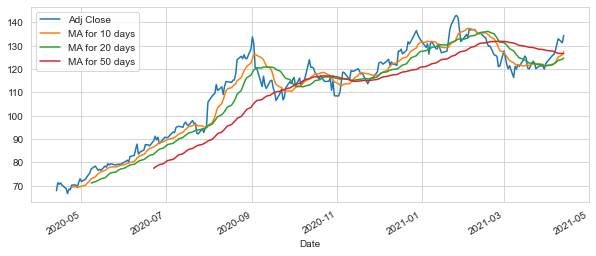

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

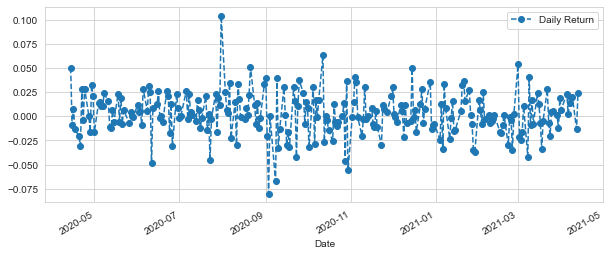

In [22]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

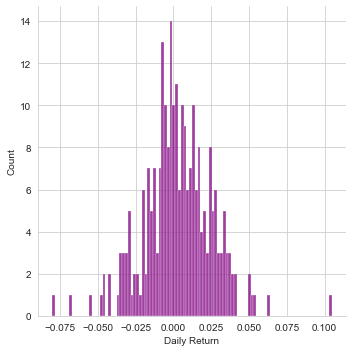

In [24]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

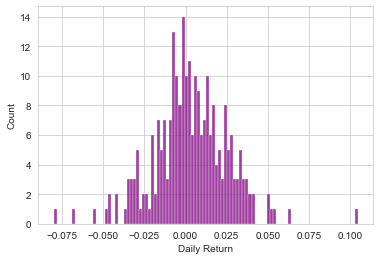

In [28]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

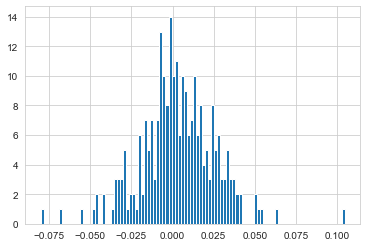

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [32]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [33]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-13,67.787041,1217.560059,163.844971,2168.870117
2020-04-14,71.210495,1269.229980,171.952606,2283.320068
2020-04-15,70.560539,1262.469971,170.150940,2307.679932
2020-04-16,71.121201,1263.469971,175.259003,2408.189941
2020-04-17,70.156174,1283.250000,176.803314,2375.000000


In [34]:
tech_rets = closing_df.pct_change()

In [35]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-13,NaN,NaN,NaN,NaN
2020-04-14,0.050503,0.042437,0.049484,0.052769
2020-04-15,-0.009127,-0.005326,-0.010478,0.010669
2020-04-16,0.007946,0.000792,0.030021,0.043555
2020-04-17,-0.013569,0.015655,0.008812,-0.013782


C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


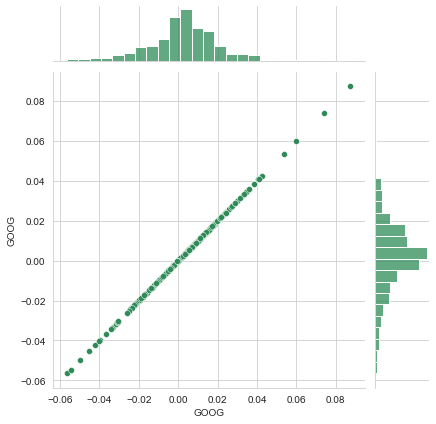

In [37]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


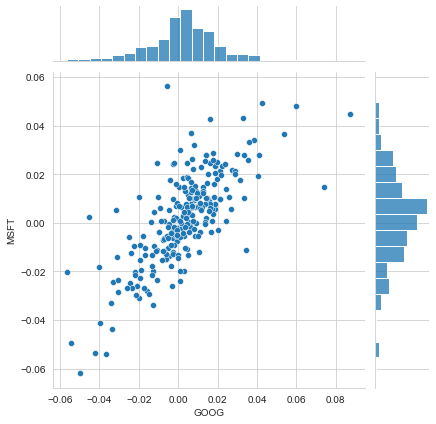

In [38]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [39]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-13,NaN,NaN,NaN,NaN
2020-04-14,0.050503,0.042437,0.049484,0.052769
2020-04-15,-0.009127,-0.005326,-0.010478,0.010669
2020-04-16,0.007946,0.000792,0.030021,0.043555
2020-04-17,-0.013569,0.015655,0.008812,-0.013782


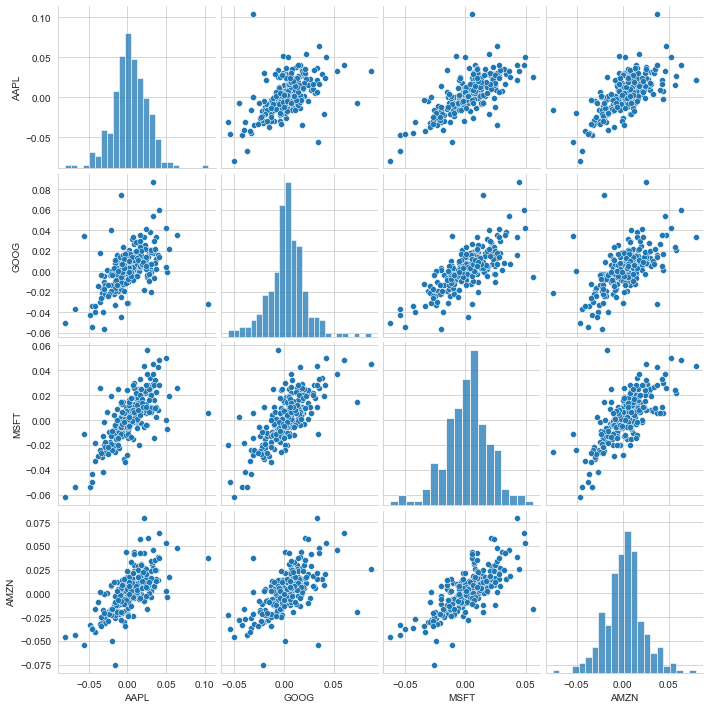

In [40]:
sns.pairplot(tech_rets.dropna())

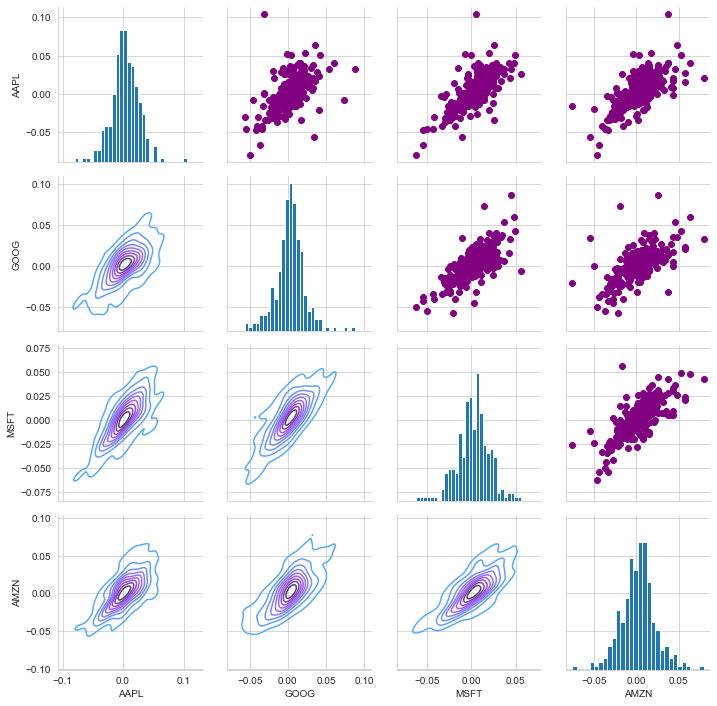

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

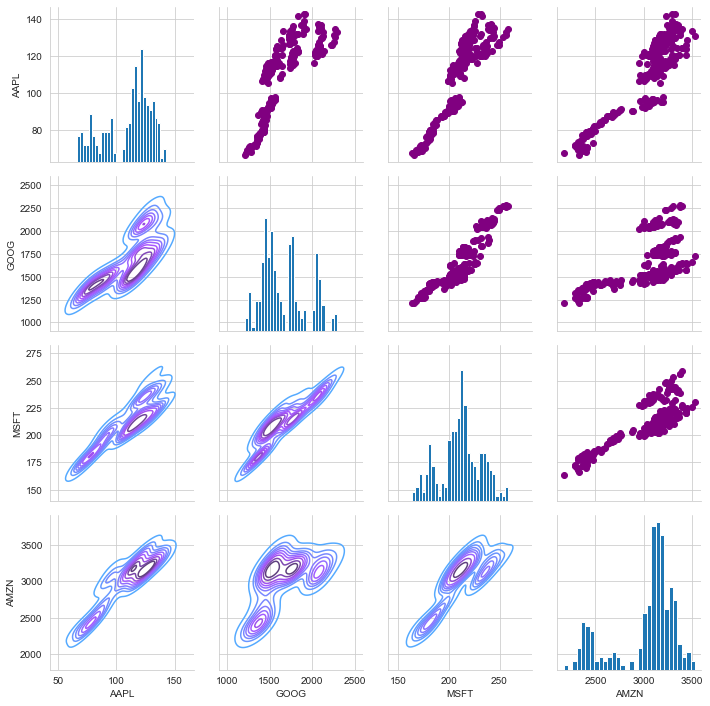

In [42]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

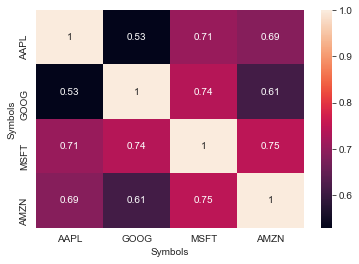

In [45]:
sns.heatmap(data = tech_rets.corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

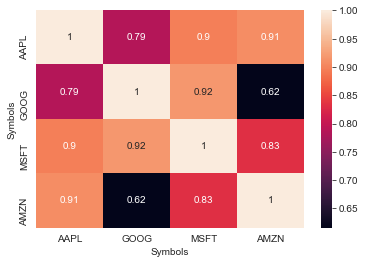

In [47]:
sns.heatmap(data = closing_df.corr(), annot=True)

**Risk Analysis**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [48]:
rets = tech_rets.dropna()

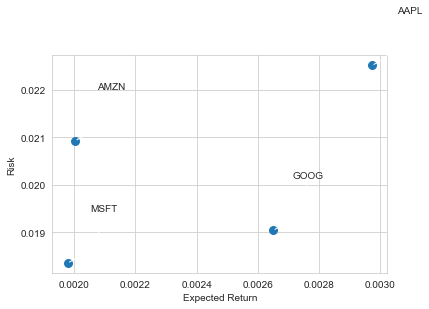

In [50]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [51]:
# Refer to matplotlib annotations guide
# https://matplotlib.org/1.5.3/users/annotations_guide.html

**Value at Risk**

Let's go ahead and define a value at risk parameter for our stocks.

We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval.

There are several methods we can use for estimating a value at risk.

Let's go ahead and see some of them in action.

**Value at risk using the "bootstrap" method**

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: https://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

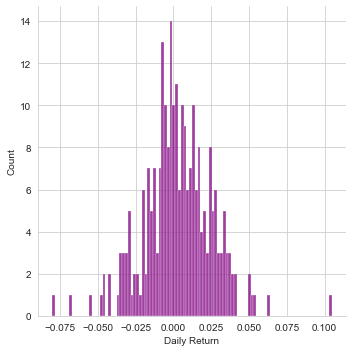

In [52]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [53]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-04-14,0.050503,0.042437,0.049484,0.052769
2020-04-15,-0.009127,-0.005326,-0.010478,0.010669
2020-04-16,0.007946,0.000792,0.030021,0.043555
2020-04-17,-0.013569,0.015655,0.008812,-0.013782
2020-04-20,-0.020757,-0.012967,-0.019821,0.007836


In [54]:
rets['AAPL'].quantile(0.05)

-0.0331028222723771

**Value at Risk using the Monte Carlo method**

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: https://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [55]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [56]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [57]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-13,1220.510010,1187.598022,1209.180054,1217.560059,1739800,1217.560059
2020-04-14,1282.069946,1236.930054,1245.089966,1269.229980,2470400,1269.229980
2020-04-15,1280.459961,1240.400024,1245.609985,1262.469971,1671700,1262.469971
2020-04-16,1279.000000,1242.619995,1274.099976,1263.469971,2518100,1263.469971
2020-04-17,1294.430054,1271.229980,1284.849976,1283.250000,1949000,1283.250000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

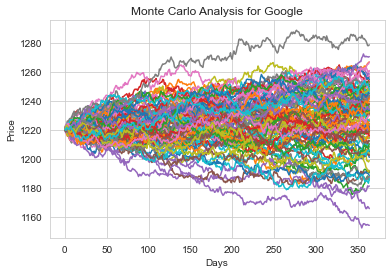

In [58]:
start_price = 1220.51

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [59]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

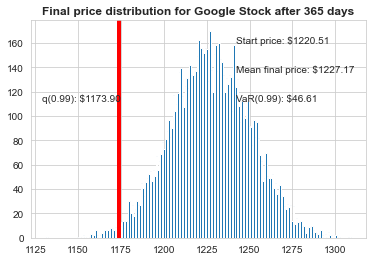

In [61]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15,0.6,"q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');